In [1]:
import pandas as pd
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Elon_musk.csv', encoding='cp1252')
df

,Unnamed: 0,Text
0,1,@kunalb11 I’m an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [3]:
df.drop(['Unnamed: 0'], inplace=True, axis=1)
df

,Text
0,@kunalb11 I’m an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


## Data Exploring

In [4]:
import itertools

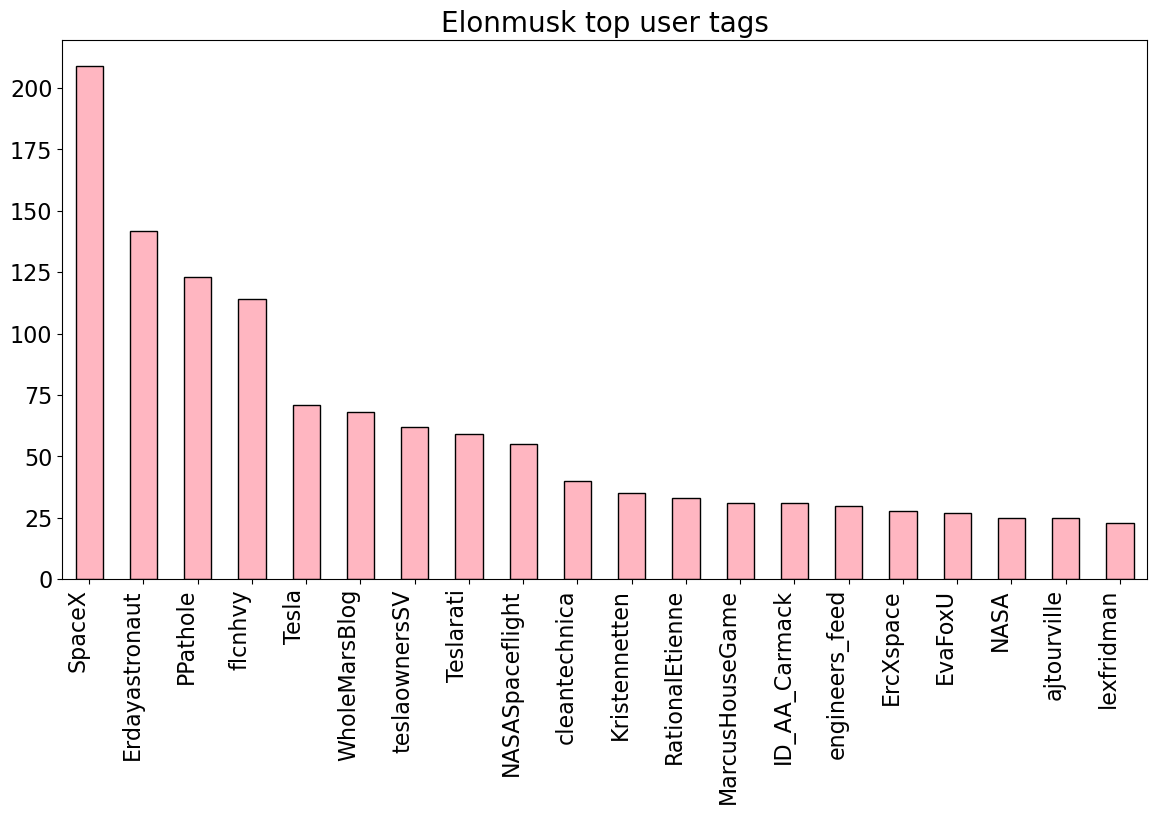

In [5]:
T = list(itertools.chain(*df.Text.map(lambda t: [handle.replace(":", "")[1:] for handle in t.split(" ") if '@' in handle.replace(":", "")]).tolist()))

pd.Series(T).value_counts().head(20).plot.bar(figsize=(14, 7), fontsize=16, color='lightpink', edgecolor='black')
plt.gca().set_title('Elonmusk top user tags', fontsize=20)
plt.gca().set_xticklabels(plt.gca().get_xticklabels(), rotation=90, ha='right', fontsize=16)
pass

In [6]:
def clean_text(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub("[0-9" "]+"," ",text)
    text = re.sub('[‘’“”…]', '', text)
    return text

clean = lambda x: clean_text(x)

df["Text"] = df["Text"].apply(clean_text) # Clean The Text
df.head(11)

,Text
0,im an alien
1,idaacarmack ray tracing on cyberpunk with hdr ...
2,joerogan spotify great interview
3,doge is underestimated
4,teslacn congratulations tesla china for amazin...
5,happy new year of the ox
6,frodo was the underdoge\nall thought he would ...
7,owensparks flcnhvy haha thanks
8,flcnhvy indeed tweets definitely do not repre...
9,the most entertaining outcome is the most likely


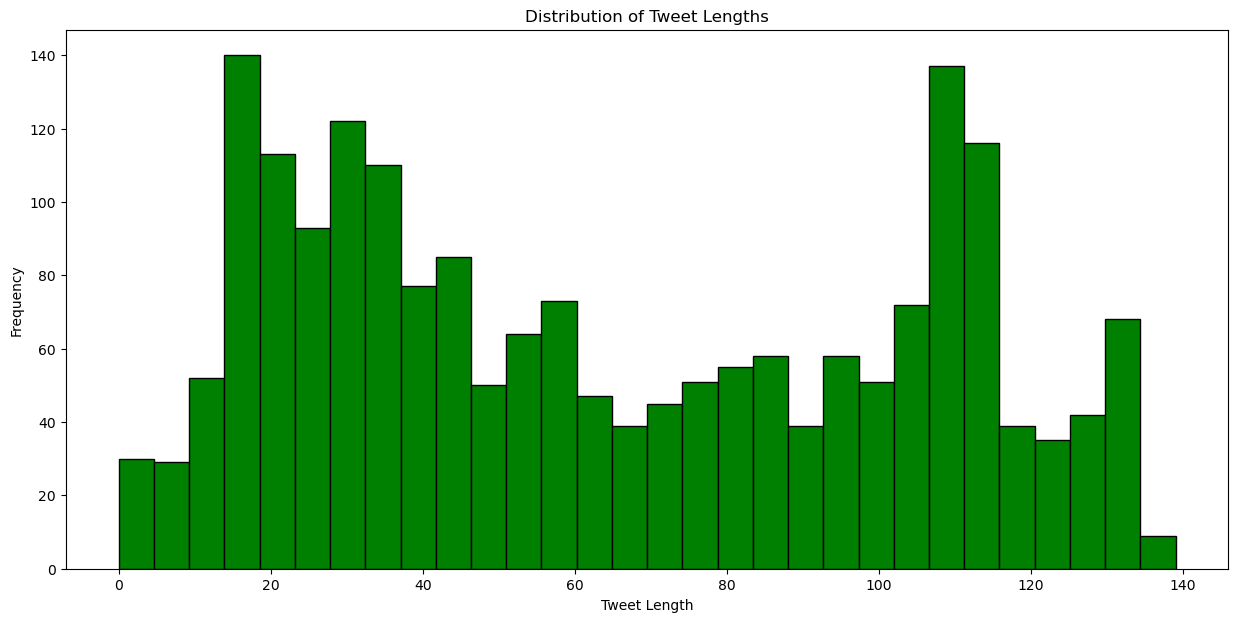

In [7]:
plt.figure(figsize=(15, 7))
df['Text_length'] = df['Text'].apply(len)
plt.hist(df['Text_length'], bins=30, color='green', edgecolor='black')
plt.title('Distribution of Tweet Lengths')
plt.xlabel('Tweet Length')
plt.ylabel('Frequency')
plt.show()

In [8]:
frequency = pd.Series(' '.join(df['Text']).split()).value_counts()
frequency

the         487
to          400
a           356
is          355
of          315
           ... 
nyquil        1
musk          1
negati        1
carousel      1
altho         1
Length: 4605, dtype: int64

## Removing stopwords

In [9]:
stop_words = stopwords.words('english')
df['Text'] = df['Text'].apply(lambda x: ' '.join(x for x in x.split() if x not in stop_words))

### Frequency after removing stowords

In [10]:
frequency_stop_words = pd.Series(' '.join(df['Text']).split()).value_counts()
frequency_stop_words

spacex            239
amp               218
tesla             166
erdayastronaut    142
rt                127
                 ... 
nyquil              1
musk                1
negati              1
carousel            1
altho               1
Length: 4482, dtype: int64

## Feature Extraction
### Frequency of words using Count Vectorizer

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

In [12]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['Text'])
bag_of_words_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
bag_of_words_df

,aber,able,abo,aboard,abort,absence,absolute,absolutely,absorb,absorption,...,zeros,zikryzamir,zogfotpik,zon,zone,zshauladventure,zubinanary,zwiebelbach,zzcool,ðogecoin
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(df['Text'])
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
tfidf_df

,aber,able,abo,aboard,abort,absence,absolute,absolutely,absorb,absorption,...,zeros,zikryzamir,zogfotpik,zon,zone,zshauladventure,zubinanary,zwiebelbach,zzcool,ðogecoin
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## N-Gram
### Bi-Gram

In [14]:
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2), max_features=2000).fit(corpus) #for tri-gram, put ngram_range=(3,3)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec1.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [15]:
top300_words = get_top_n2_words(df['Text'], n=300) #top 300
top300_df = pd.DataFrame(top300_words)
top300_df.columns = ['Bi-gram', 'Freq']
top300_df

,Bi-gram,Freq
0,rt spacex,71
1,spacex falcon,17
2,erdayastronaut spacex,16
3,pretty much,12
4,rt nasa,12
...,...,...
295,useful products,2
296,cant sell,2
297,cars dont,2
298,amp inference,2


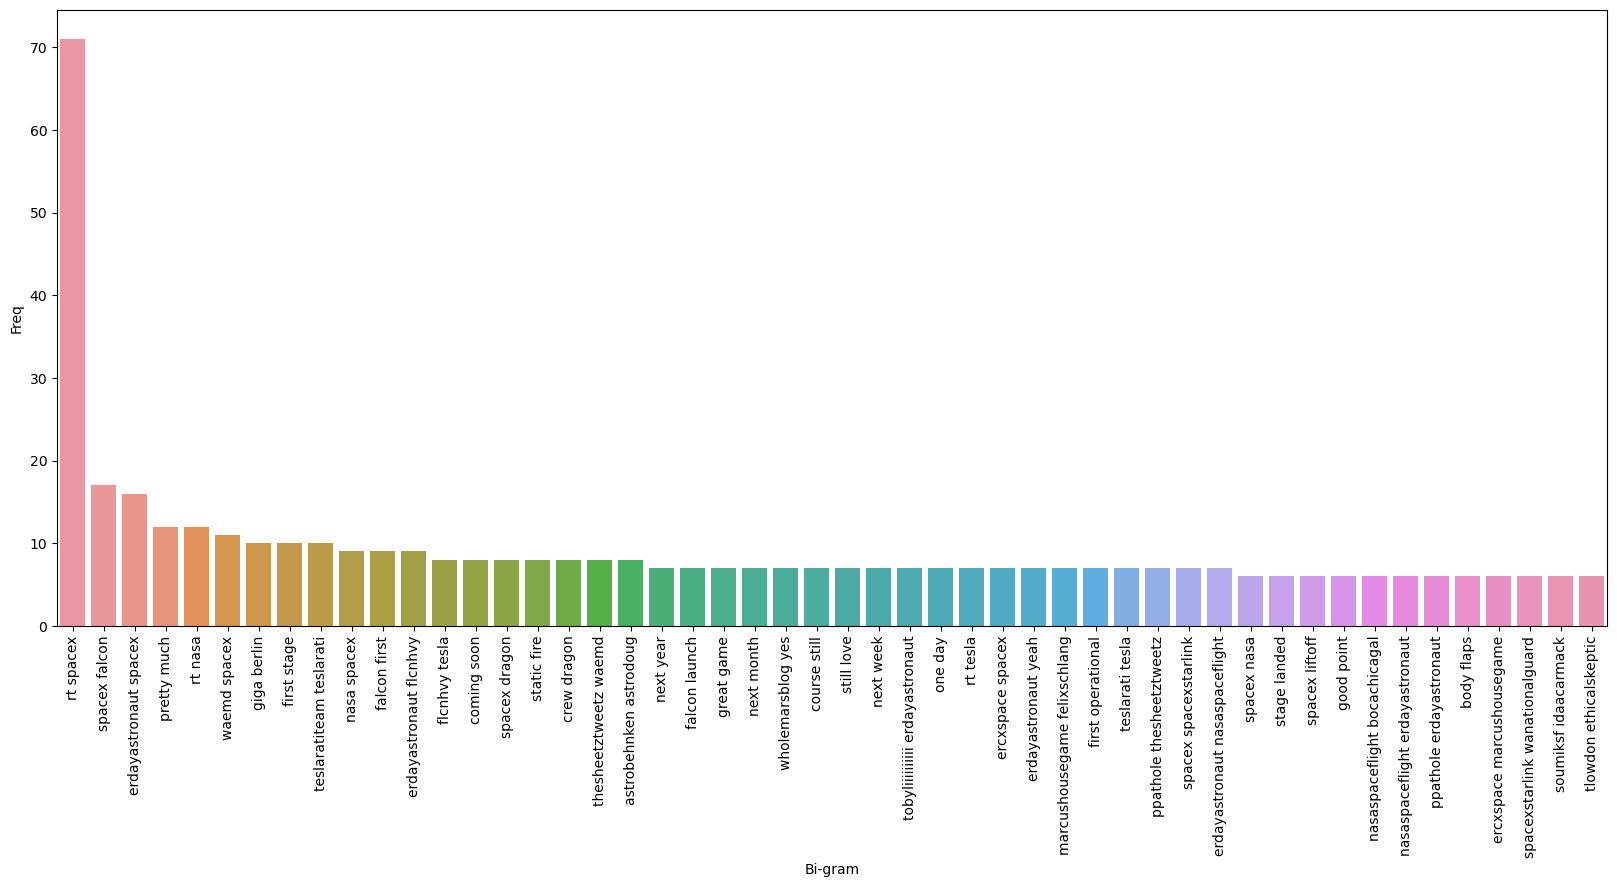

In [16]:
import seaborn as sns
top300_bigram = top300_df.iloc[0:50, :]
fig = plt.figure(figsize=(20, 8))
plot = sns.barplot(x=top300_bigram['Bi-gram'], y=top300_bigram['Freq'])
plot.set_xticklabels(rotation=90, labels=top300_bigram['Bi-gram'])
plt.show()

### Tri-Gram

In [17]:
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [18]:
top250_words = get_top_n3_words(df["Text"], n=250)
top250_df = pd.DataFrame(top250_words)
top250_df.columns = ["Tri-gram", "Freq"]
top250_df

,Tri-gram,Freq
0,rt spacex falcon,17
1,falcon first stage,9
2,spacex falcon first,8
3,thesheetztweetz waemd spacex,8
4,course still love,7
...,...,...
245,nasa selected falcon,1
246,selected falcon heavy,1
247,rationaletienne adamklotz predict,1
248,predict cash flow,1


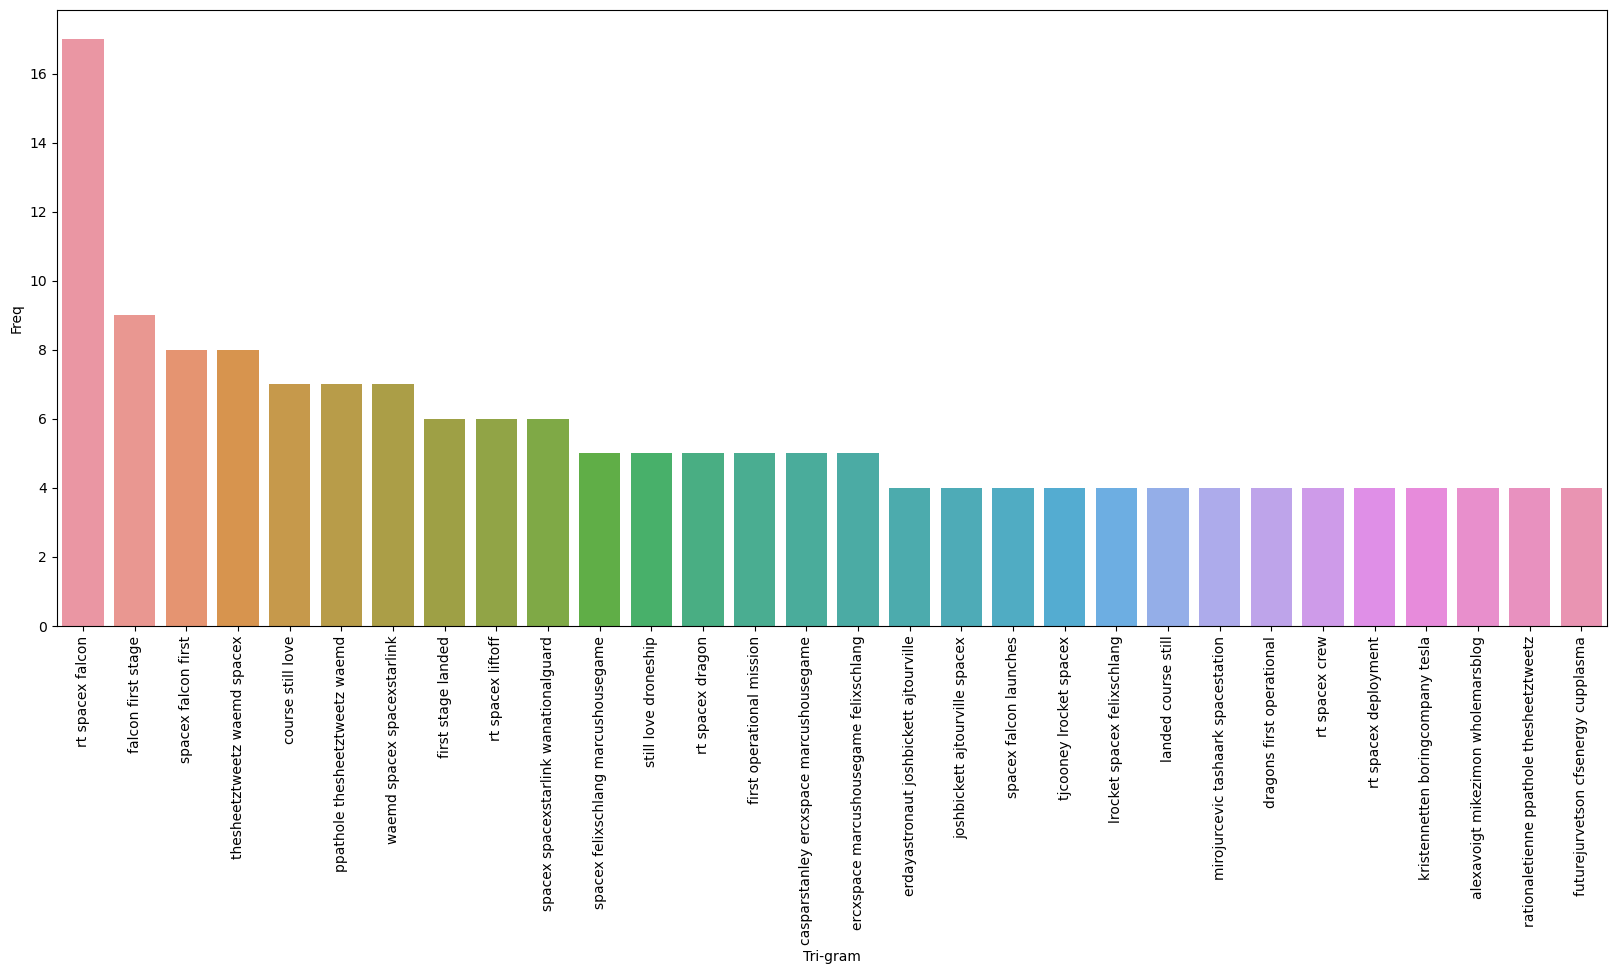

In [19]:
top250_trigram = top250_df.iloc[0:30,:]
fig = plt.figure(figsize = (20, 8))
plot = sns.barplot(x=top250_trigram["Tri-gram"],y=top250_trigram["Freq"])
plot.set_xticklabels(rotation=90,labels = top250_trigram["Tri-gram"])
plt.show()

In [20]:
string_Total = ' '.join(df['Text'])

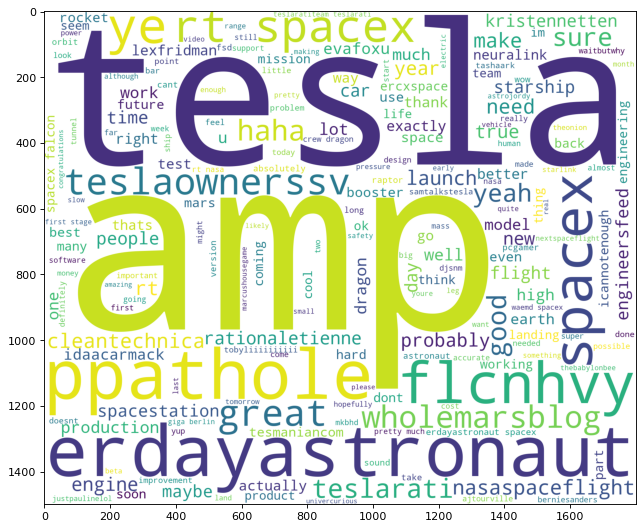

In [21]:
plt.figure(figsize=(15, 8), dpi=80)
wordcloud_stw = WordCloud(background_color= 'white', width = 1800, height = 1500).generate(string_Total)
plt.imshow(wordcloud_stw);

In [22]:
# VADER Sentiment Analyzer
# Calculate polarity score of Text
sia = SentimentIntensityAnalyzer()
df['polarity'] = df['Text'].apply(lambda x: sia.polarity_scores(x)['compound'])

In [23]:
df

,Text,Text_length,polarity
0,im alien,12,0.0000
1,idaacarmack ray tracing cyberpunk hdr nextleve...,76,0.0000
2,joerogan spotify great interview,32,0.6249
3,doge underestimated,23,-0.2732
4,teslacn congratulations tesla china amazing ex...,100,0.8271
...,...,...,...
1994,flcnhvy true sounds surreal negative propagand...,115,-0.0000
1995,ppathole make sure read ur terms amp condition...,73,0.5994
1996,teslagong ppathole samwise gamgee,33,0.0000
1997,ppathole altho dumb dumber,34,-0.7003


In [24]:
# Create a user-defined function to identify if tweets are positive, negative, or neutral
def classify_sentiment(polarity):
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

In [25]:
df['sentiment'] = df['polarity'].apply(classify_sentiment)
df

,Text,Text_length,polarity,sentiment
0,im alien,12,0.0000,Neutral
1,idaacarmack ray tracing cyberpunk hdr nextleve...,76,0.0000,Neutral
2,joerogan spotify great interview,32,0.6249,Positive
3,doge underestimated,23,-0.2732,Negative
4,teslacn congratulations tesla china amazing ex...,100,0.8271,Positive
...,...,...,...,...
1994,flcnhvy true sounds surreal negative propagand...,115,-0.0000,Neutral
1995,ppathole make sure read ur terms amp condition...,73,0.5994,Positive
1996,teslagong ppathole samwise gamgee,33,0.0000,Neutral
1997,ppathole altho dumb dumber,34,-0.7003,Negative


In [26]:
from textblob import TextBlob

In [27]:
# Include Subjectivity using TextBlob
df['subjectivity'] = df['Text'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

In [28]:
df

,Text,Text_length,polarity,sentiment,subjectivity
0,im alien,12,0.0000,Neutral,0.750000
1,idaacarmack ray tracing cyberpunk hdr nextleve...,76,0.0000,Neutral,0.000000
2,joerogan spotify great interview,32,0.6249,Positive,0.750000
3,doge underestimated,23,-0.2732,Negative,0.000000
4,teslacn congratulations tesla china amazing ex...,100,0.8271,Positive,0.322222
...,...,...,...,...,...
1994,flcnhvy true sounds surreal negative propagand...,115,-0.0000,Neutral,0.508333
1995,ppathole make sure read ur terms amp condition...,73,0.5994,Positive,0.888889
1996,teslagong ppathole samwise gamgee,33,0.0000,Neutral,0.000000
1997,ppathole altho dumb dumber,34,-0.7003,Negative,0.500000


In [29]:
df["category"]=df['polarity']

df.loc[df['category'] > 0, 'category'] = "Positive"
df.loc[df['category'] != 'Positive', 'category'] = "Negative"

df["category"]=df["category"].astype('category')
df.dtypes

Text              object
Text_length        int64
polarity         float64
sentiment         object
subjectivity     float64
category        category
dtype: object

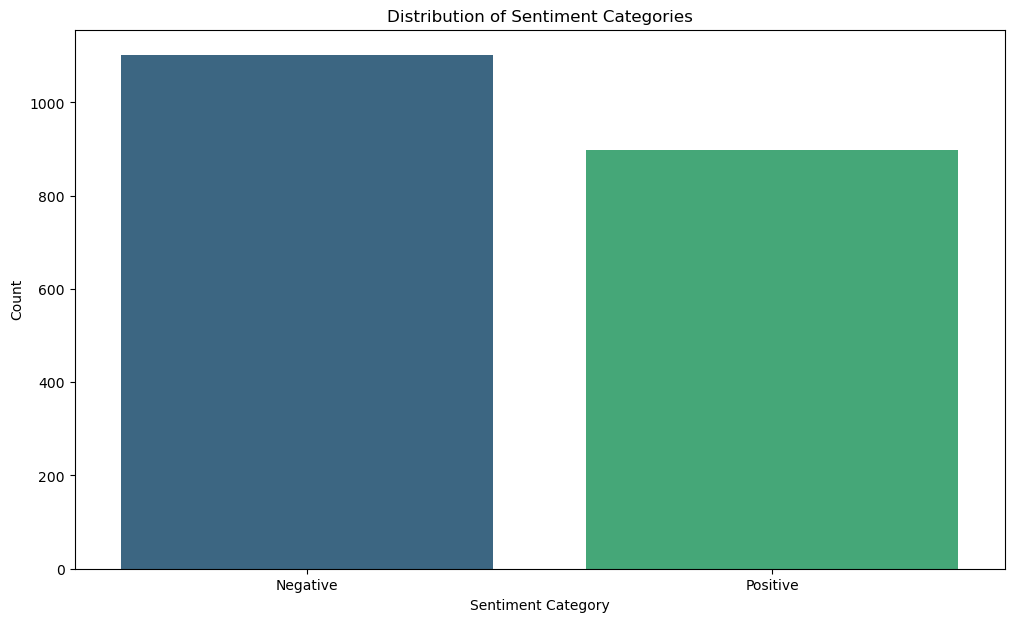

In [30]:
plt.figure(figsize=(12, 7))
sns.countplot(x='category', data=df, palette='viridis')
plt.title('Distribution of Sentiment Categories')
plt.xlabel('Sentiment Category')
plt.ylabel('Count')
plt.show()

In [31]:
df.category.value_counts(normalize=True).mul(100)

Negative    55.077539
Positive    44.922461
Name: category, dtype: float64

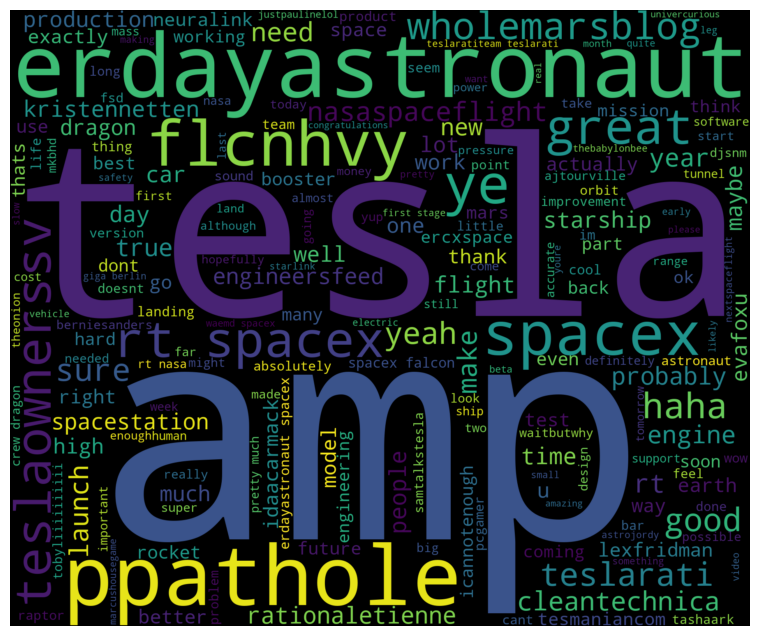

In [33]:
allwords = ' '.join([twts for twts in df["Text"]])
wordCloud = WordCloud(width = 1800, height = 1500, random_state = 25).generate(allwords)
plt.figure(figsize=(15,8), dpi=100)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis("off")
plt.show()